## 6. Simplify Shapefile

Use this notebook to simplify the segments shapefile. Run this after adding statistics attributes to the segments shapefile.

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors


### Load shapefile

In [2]:
gdf = gpd.read_file("/import/beegfs/CMIP6/jdpaul3/hydroviz_data/gis/xwalk/seg_h8_outlet_stats.shp")

### Simplify

In [15]:
# make sure CRS is projected so we can use meters
gdf.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
# tolerance is max distance line can be from original geometry, so 200m in this case
# preserve topology ensures the simplified geometry does not intersect itself or become invalid
simplified_gdf = gdf.copy()
simplified_gdf.geometry = gdf.simplify(tolerance=200, preserve_topology=True)

### Plot to compare

#### Mississippi River Region

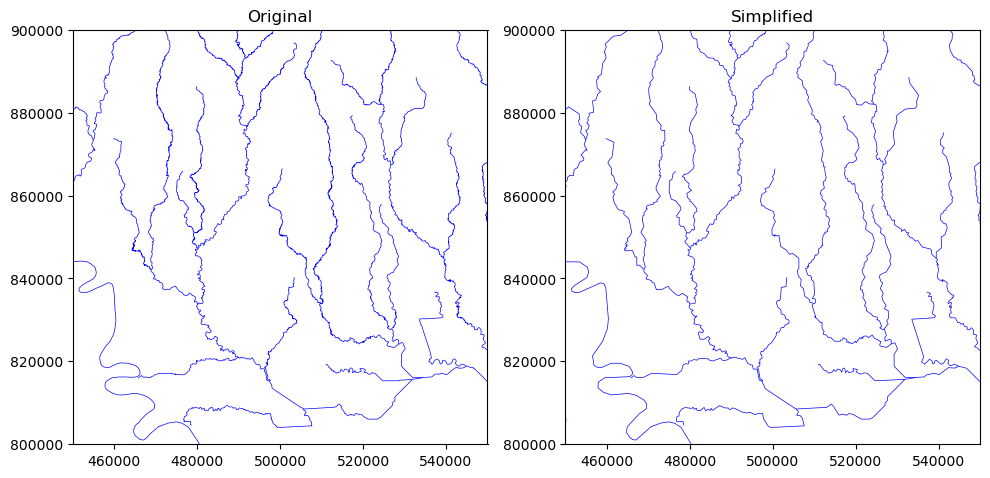

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
gdf.plot(ax=ax[0], color="blue", linewidth=0.5)
simplified_gdf.plot(ax=ax[1], color="blue", linewidth=0.5)

ax[0].set_title("Original")
ax[1].set_title("Simplified")

for a in ax.flatten():
    a.set_aspect('equal')
    a.set_xlim(450000, 550000)
    a.set_ylim(800000, 900000)

plt.tight_layout()

### Compare vertex count

In [42]:
# Count all vertices in the entire GeoDataFrame

print(f"Total vertices in original shapefile: {gdf.geometry.apply(lambda geom: len(geom.coords) if geom is not None else 0).sum()}")
print(f"Total vertices in simplified shapefile: {simplified_gdf.geometry.apply(lambda geom: len(geom.coords) if geom is not None else 0).sum()}")

Total vertices in original shapefile: 11013302
Total vertices in simplified shapefile: 744577


### Save

In [43]:
simplified_gdf.to_file("/import/beegfs/CMIP6/jdpaul3/hydroviz_data/gis/xwalk/seg_h8_outlet_stats_simplified.shp")